In [1]:
import tweepy 
import pandas as pd
from datetime import datetime,timedelta
import csv


consumer_key = "lgs2JQ9A1o9FCVv6OryXW7fwk"

consumer_secret ="0CqwSl0H9OYhSeNRB9MqVPsXI0VuAtF9NdQrm2XSUMCRwZEyLG"
access_token = "1347841282190688257-VXFr1x9vw34siQuRQ4tO3pchhISD77"
access_token_secret = "fl1XGiFLy5JapqX1tJvyA8Hayoob6uRPxshizZGfSPXlA"


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [6]:
hashtags = ["HEALTHNOW","BCBSWNY","BLUECROSS","BLUESHIELD","HNNY"]

In [12]:


df = pd.DataFrame(columns = ["Hashtag", "Tweets", "User", "User_Followers",
"User_Location", "User_Verified", "User_Lang", "User_Status", 
"User_Method", "Fav_Count", "RT_Count", "Tweet_date"])

def tweepy_df(df,tags):
    for cash in tags:
        i = len(df)+1
        for tweet in tweepy.Cursor(api.search, q= cash,geocode="42.8864468,-78.8783689,500km", since = "2021-01-30", until = "2021-02-01").items(5):
            print(i, end = '\r')
            df.loc[i, "Hashtag"] = cash
            df.loc[i, "Tweets"] = tweet.text
            df.loc[i, "User"] = tweet.user.name
            df.loc[i, "User_Followers"] = 0
#             df.loc[i, "User_Followers"] = tweet.followers_count
            df.loc[i, "User_Location"] = tweet.user.location
            df.loc[i, "User_Verified"] = tweet.user.verified
            df.loc[i, "User_Lang"] = tweet.lang
            df.loc[i, "User_Status"] = tweet.user.statuses_count
            df.loc[i, "User_Method"] = tweet.source
            df.loc[i, "Fav_Count"] = tweet.favorite_count
            df.loc[i, "RT_Count"] = tweet.retweet_count
            df.loc[i, "Tweet_date"] = tweet.created_at
            i+=1
    return df

In [13]:
new_df = tweepy_df(df, hashtags)
new_df.head(10)

,Hashtag,Tweets,User,User_Followers,User_Location,User_Verified,User_Lang,User_Status,User_Method,Fav_Count,RT_Count,Tweet_date
1,BCBSWNY,RT @AlbrightKnox: 🌹 💌 Join us 2/12 as Art T...,GHofmar,0,"New York, USA",False,en,563814,Twitter for iPhone,0,2,2021-01-31 21:03:15
2,BCBSWNY,🌹 💌 Join us 2/12 as Art Truck Program Coord...,Albright-Knox,0,"Buffalo, NY",False,en,17608,Sprout Social,6,2,2021-01-31 21:00:07
3,BCBSWNY,RT @AlbrightKnox: Follow along with @WKBW for ...,Maureen Hanagan,0,"Buffalo, NY",False,en,313,Twitter for iPhone,0,4,2021-01-30 00:13:43
4,BLUECROSS,@TrinityStClair BlueCross blue shield,amore34,0,Upstate NY,False,en,538,Twitter for iPhone,0,0,2021-01-31 13:03:35
5,BLUECROSS,@AnthemBCBS is the worst. Evidently health ins...,Dru,0,"Washington, DC",False,en,6351,Twitter for iPhone,0,0,2021-01-30 20:57:20
6,HNNY,Sometimes I realize before I go on my jog that...,Dr. Alexandre Muns Rubiol,0,"Washington, DC",False,en,1376,Instagram,0,0,2021-01-30 16:11:50


In [14]:
new_df

,Hashtag,Tweets,User,User_Followers,User_Location,User_Verified,User_Lang,User_Status,User_Method,Fav_Count,RT_Count,Tweet_date
1,BCBSWNY,RT @AlbrightKnox: 🌹 💌 Join us 2/12 as Art T...,GHofmar,0,"New York, USA",False,en,563814,Twitter for iPhone,0,2,2021-01-31 21:03:15
2,BCBSWNY,🌹 💌 Join us 2/12 as Art Truck Program Coord...,Albright-Knox,0,"Buffalo, NY",False,en,17608,Sprout Social,6,2,2021-01-31 21:00:07
3,BCBSWNY,RT @AlbrightKnox: Follow along with @WKBW for ...,Maureen Hanagan,0,"Buffalo, NY",False,en,313,Twitter for iPhone,0,4,2021-01-30 00:13:43
4,BLUECROSS,@TrinityStClair BlueCross blue shield,amore34,0,Upstate NY,False,en,538,Twitter for iPhone,0,0,2021-01-31 13:03:35
5,BLUECROSS,@AnthemBCBS is the worst. Evidently health ins...,Dru,0,"Washington, DC",False,en,6351,Twitter for iPhone,0,0,2021-01-30 20:57:20
6,HNNY,Sometimes I realize before I go on my jog that...,Dr. Alexandre Muns Rubiol,0,"Washington, DC",False,en,1376,Instagram,0,0,2021-01-30 16:11:50


In [17]:
# Create a function to clean the tweets
import regex as re

def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
new_df['Tweets'] = new_df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
new_df

,Hashtag,Tweets,User,User_Followers,User_Location,User_Verified,User_Lang,User_Status,User_Method,Fav_Count,RT_Count,Tweet_date
1,BCBSWNY,: 🌹 💌 Join us 2/12 as Art Truck Program Coo...,GHofmar,0,"New York, USA",False,en,563814,Twitter for iPhone,0,2,2021-01-31 21:03:15
2,BCBSWNY,🌹 💌 Join us 2/12 as Art Truck Program Coord...,Albright-Knox,0,"Buffalo, NY",False,en,17608,Sprout Social,6,2,2021-01-31 21:00:07
3,BCBSWNY,: Follow along with for a visit to the ArtTru...,Maureen Hanagan,0,"Buffalo, NY",False,en,313,Twitter for iPhone,0,4,2021-01-30 00:13:43
4,BLUECROSS,BlueCross blue shield,amore34,0,Upstate NY,False,en,538,Twitter for iPhone,0,0,2021-01-31 13:03:35
5,BLUECROSS,is the worst. Evidently health insurance can ...,Dru,0,"Washington, DC",False,en,6351,Twitter for iPhone,0,0,2021-01-30 20:57:20
6,HNNY,Sometimes I realize before I go on my jog that...,Dr. Alexandre Muns Rubiol,0,"Washington, DC",False,en,1376,Instagram,0,0,2021-01-30 16:11:50


In [20]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
new_df['Subjectivity'] = new_df['Tweets'].apply(getSubjectivity)
new_df['Polarity'] = new_df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
new_df

,Hashtag,Tweets,User,User_Followers,User_Location,User_Verified,User_Lang,User_Status,User_Method,Fav_Count,RT_Count,Tweet_date,Subjectivity,Polarity
1,BCBSWNY,: 🌹 💌 Join us 2/12 as Art Truck Program Coo...,GHofmar,0,"New York, USA",False,en,563814,Twitter for iPhone,0,2,2021-01-31 21:03:15,0.800,0.400
2,BCBSWNY,🌹 💌 Join us 2/12 as Art Truck Program Coord...,Albright-Knox,0,"Buffalo, NY",False,en,17608,Sprout Social,6,2,2021-01-31 21:00:07,0.800,0.400
3,BCBSWNY,: Follow along with for a visit to the ArtTru...,Maureen Hanagan,0,"Buffalo, NY",False,en,313,Twitter for iPhone,0,4,2021-01-30 00:13:43,0.300,0.200
4,BLUECROSS,BlueCross blue shield,amore34,0,Upstate NY,False,en,538,Twitter for iPhone,0,0,2021-01-31 13:03:35,0.100,0.000
5,BLUECROSS,is the worst. Evidently health insurance can ...,Dru,0,"Washington, DC",False,en,6351,Twitter for iPhone,0,0,2021-01-30 20:57:20,0.625,-0.375
6,HNNY,Sometimes I realize before I go on my jog that...,Dr. Alexandre Muns Rubiol,0,"Washington, DC",False,en,1376,Instagram,0,0,2021-01-30 16:11:50,0.175,0.000


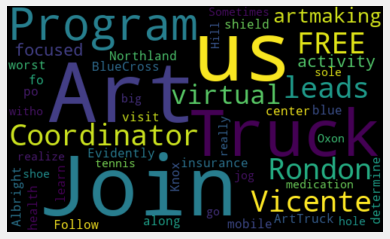

In [21]:
# word cloud visualization
allWords = ' '.join([twts for twts in new_df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
new_df['Analysis'] = new_df['Polarity'].apply(getAnalysis)
# Show the dataframe
new_df

,Hashtag,Tweets,User,User_Followers,User_Location,User_Verified,User_Lang,User_Status,User_Method,Fav_Count,RT_Count,Tweet_date,Subjectivity,Polarity,Analysis
1,BCBSWNY,: 🌹 💌 Join us 2/12 as Art Truck Program Coo...,GHofmar,0,"New York, USA",False,en,563814,Twitter for iPhone,0,2,2021-01-31 21:03:15,0.800,0.400,Positive
2,BCBSWNY,🌹 💌 Join us 2/12 as Art Truck Program Coord...,Albright-Knox,0,"Buffalo, NY",False,en,17608,Sprout Social,6,2,2021-01-31 21:00:07,0.800,0.400,Positive
3,BCBSWNY,: Follow along with for a visit to the ArtTru...,Maureen Hanagan,0,"Buffalo, NY",False,en,313,Twitter for iPhone,0,4,2021-01-30 00:13:43,0.300,0.200,Positive
4,BLUECROSS,BlueCross blue shield,amore34,0,Upstate NY,False,en,538,Twitter for iPhone,0,0,2021-01-31 13:03:35,0.100,0.000,Neutral
5,BLUECROSS,is the worst. Evidently health insurance can ...,Dru,0,"Washington, DC",False,en,6351,Twitter for iPhone,0,0,2021-01-30 20:57:20,0.625,-0.375,Negative
6,HNNY,Sometimes I realize before I go on my jog that...,Dr. Alexandre Muns Rubiol,0,"Washington, DC",False,en,1376,Instagram,0,0,2021-01-30 16:11:50,0.175,0.000,Neutral


In [25]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = new_df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
    j= j+1

Printing positive tweets:



KeyError: 0

In [26]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = new_df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
    j=j+1

Printing negative tweets:



KeyError: 0

In [29]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, new_df.shape[0]):
    plt.scatter(new_df["Polarity"][i],new_df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

KeyError: 0

<Figure size 576x432 with 0 Axes>